<a href="https://colab.research.google.com/github/Samiha9864/CVPR/blob/main/Knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import os
import numpy as np
import kagglehub

#data_dir = kagglehub.dataset_download("ashishsaxena2209/animal-image-datasetdog-cat-and-panda")

print("Path to dataset files:", data_dir)

Path to dataset files: /kaggle/input/animal-image-datasetdog-cat-and-panda


In [ ]:
classes = ['cats', 'dogs', 'panda']
data = []
labels = []

for label, class_name in enumerate(classes):
    class_path = os.path.join(data_dir, 'animals',class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (32, 32))
        data.append(img.flatten())
        labels.append(label)

data = np.array(data)
labels = np.array(labels)


In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))


In [ ]:
class KNNClassifier:
    def __init__(self, k=3, distance_func='l2'):
        self.k = k
        self.distance_func = euclidean_distance if distance_func == 'l2' else manhattan_distance

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        preds = []
        for x in X_test:
            distances = [self.distance_func(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_indices]
            values, counts = np.unique(k_nearest_labels, return_counts=True)
            preds.append(values[np.argmax(counts)])
        return np.array(preds)

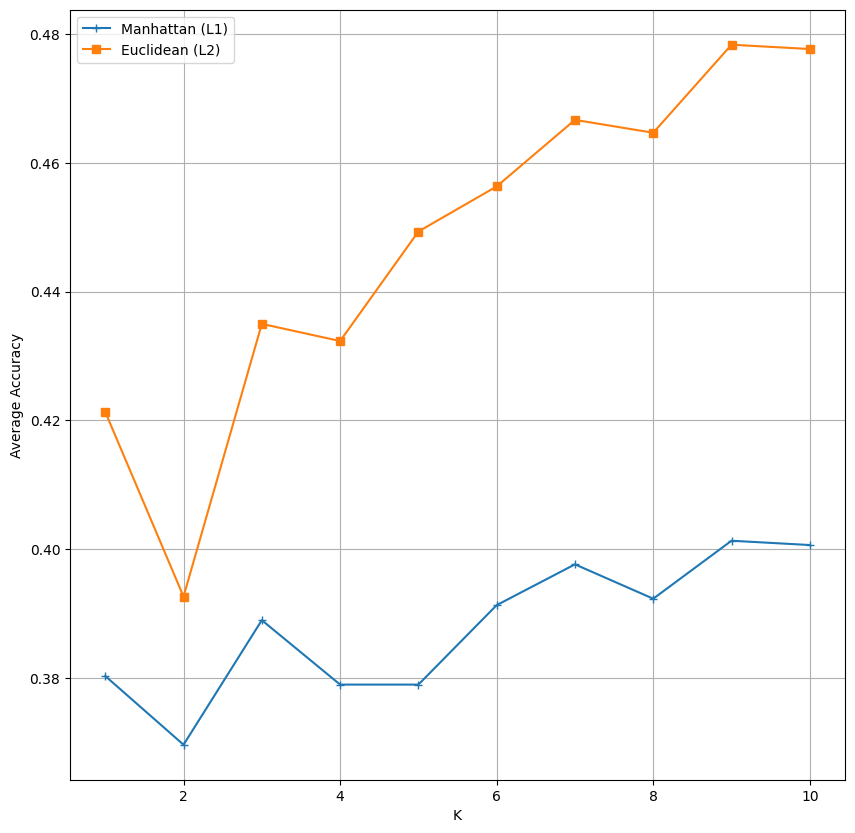

In [ ]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

kf = KFold(n_splits=5, shuffle=True, random_state=42)
k_values = list(range(1, 11))
results = {'l1': [], 'l2': []}

for metric in ['l1', 'l2']:
    avg_accuracies = []
    for k in k_values:
        acc_fold = []
        for train_idx, val_idx in kf.split(data):
            knn = KNNClassifier(k=k, distance_func=metric)
            knn.fit(data[train_idx], labels[train_idx])
            preds = knn.predict(data[val_idx])
            acc = np.mean(preds == labels[val_idx])
            acc_fold.append(acc)
        avg_accuracies.append(np.mean(acc_fold))
    results[metric] = avg_accuracies

plt.figure(figsize=(10, 10))
plt.plot(k_values, results['l1'], label='Manhattan (L1)', marker='+')
plt.plot(k_values, results['l2'], label='Euclidean (L2)', marker='s')
plt.xlabel('K')
plt.ylabel('Average Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import random
import matplotlib.pyplot as plt

test_indices = random.sample(range(len(data)), 100)
test_samples = data[test_indices]
true_labels = labels[test_indices]

knn_best = KNNClassifier(k=3, distance_func='l2')
knn_best.fit(data, labels)
preds = knn_best.predict(test_samples)


for i, idx in enumerate(test_indices):
    img = data[idx].reshape(32,32)
    plt.figure(figsize=(100,1))
    plt.imshow(img)
    plt.title(f'True: {classes[true_labels[i]]}, Pred: {classes[preds[i]]}')
    plt.axis('off')
    plt.show()


ValueError: cannot reshape array of size 1024 into shape (64,64)